# Gaussian Processes!

Warning: I've prioritized making nicer live demos (e.g. by using as little vertical space as possible and putting breaks between code blocks to avoid spoilers) over typical code readability standards.

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
rng = np.random.RandomState()

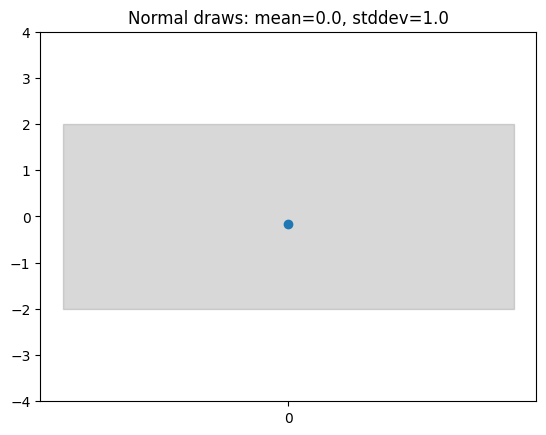

In [2]:
numdraws = 1; mean = 0.0; stddev = 1.0
draws = rng.normal(mean,stddev,numdraws) # draw the random draws
numx=100; x=np.linspace(start=-1,stop=1,num=numx); twosd=2*stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd+mean,-twosd+mean,color="gray",alpha=0.3) # coloring 2 std dev range
plt.scatter(np.zeros(numdraws),draws) # plotting the draw(s)
plt.ylim((-4*stddev+mean,4*stddev+mean)); pltaxes = plt.gca(); pltaxes.axes.get_xaxis().set_ticks([0]) # make the plot
output = plt.title("Normal draws: mean=" + str(mean) + ", stddev=" + str(stddev)) # make the plot

In [3]:
bnd = 4.0
p_1_in = sp.stats.norm.cdf(bnd,0,1)-sp.stats.norm.cdf(-bnd,0,1)
p_100_in = np.exp(100*np.log(p_1_in))
text = "The probability of one data point outside " + str(bnd)
text = text + " standard deviations is " + str(1-p_1_in) 
text = text + ". The probability of any in 100 points outside that range is " + str(1-p_100_in)
print(text)

The probability of one data point outside 4.0 standard deviations is 6.334248366623996e-05. The probability of any in 100 points outside that range is 0.00631442866149845


In [4]:
from matplotlib import cm

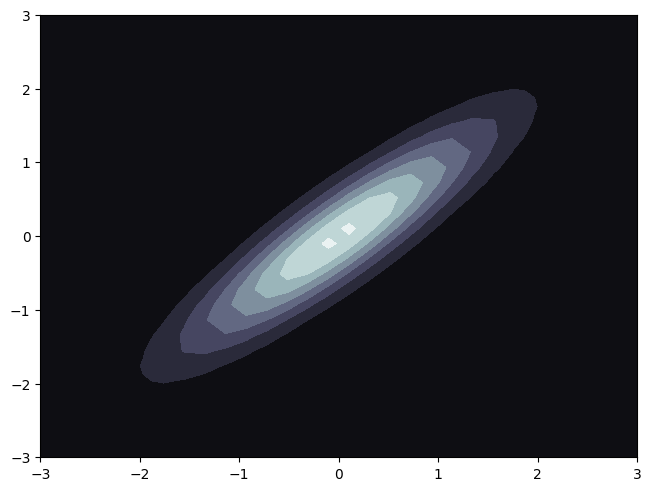

In [8]:
# see also https://scipython.com/blog/visualizing-the-bivariate-gaussian-distribution/ by christian
# for a fancy combo of both 3d and counter plots
mu = np.zeros(2); corr = 0.9
cov = np.array([[1.0,corr],[corr,1.0]])
numy = 30; y=np.linspace(-3,3,numy); y1,y2 = np.meshgrid(y,y)
pos = np.empty(y1.shape + (2,)); pos[:,:,0] = y1; pos[:,:,1] = y2
distr = sp.stats.multivariate_normal(mu,cov)
dens = distr.pdf(pos)

fig, ax = plt.subplots(layout='constrained')
surf = ax.contourf(y1,y2,dens,cmap=plt.cm.bone)
plt.show()

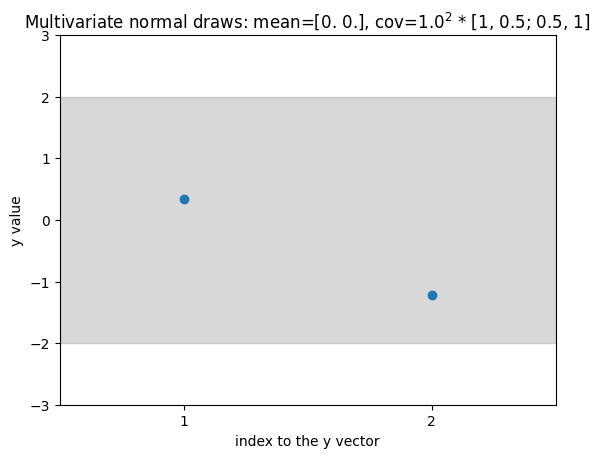

In [5]:
mean = np.zeros(2); signal_stddev = 1.0; corr = 0.5
cov = signal_stddev**2*np.array([[1,corr],[corr,1]]) # covariance matrix
numdraws = 1; draws=rng.multivariate_normal(mean,cov,size=numdraws); # make the draws
numx=100; xstart=0.5; xstop=2.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
marker_collection=["o","^","x"]
for i in np.arange(0,numdraws,1): plt.scatter([1,2],draws[i,:],marker=marker_collection[np.mod(i,3)]); # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca(); pltaxes.axes.get_xaxis().set_ticks([1,2]); plt.xlabel("index to the y vector"); plt.ylabel("y value") # make the plot
output = plt.title("Multivariate normal draws: mean=" + str(mean) + ", cov=" + str(signal_stddev) + "$^2$ * [1, " + str(corr) + "; " + str(corr) + ", 1]") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

In [6]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

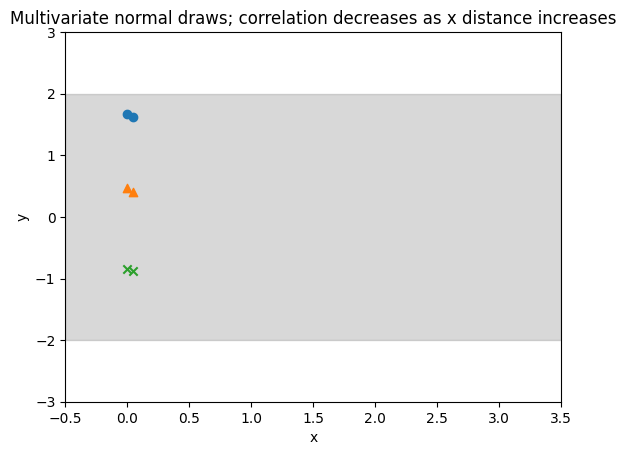

In [7]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca(); plt.xlabel("x"); plt.ylabel("y")  # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

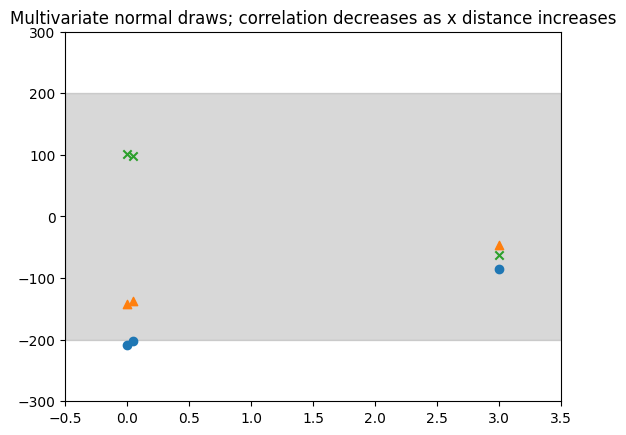

In [8]:
signal_stddev = 100.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=100; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.array([0.0,0.05,3.0]).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

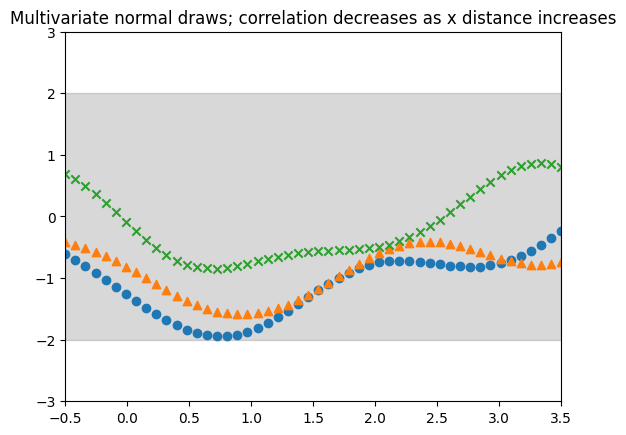

In [9]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xdraw=np.linspace(start=xstart,stop=xstop,num=numx).reshape(-1,1); y_all_draws=gp.sample_y(xdraw,random_state=rng,n_samples=3); marker_collection=["o","^","x"]
for i, ydraw in enumerate(y_all_draws.T): plt.scatter(xdraw,ydraw,marker=marker_collection[np.mod(i,3)]) #plt.plot(xdraw,ydraw) # plotting the draws
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("Multivariate normal draws; correlation decreases as x distance increases") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

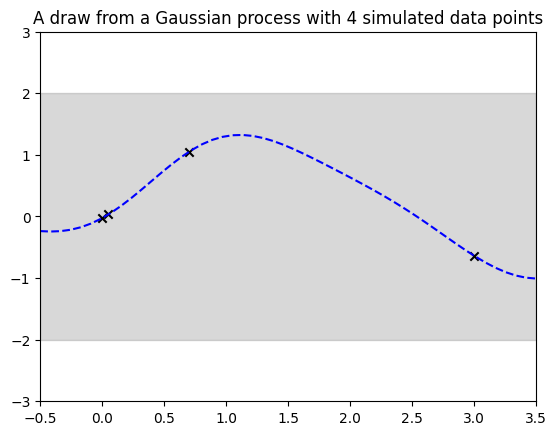

In [15]:
signal_stddev = 1.0; kern = signal_stddev**2*RBF(length_scale=1.0,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xobs = np.array([0.0,0.05,0.7,3.0]); Nobs = xobs.shape[0]
numx=50; xstart=-0.5; xstop=3.5; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]; yobs=yall[numx:numx+Nobs]
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue"); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

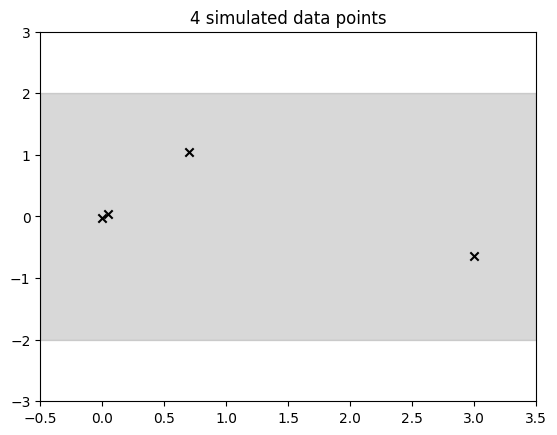

In [16]:
# just the training data
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title(str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

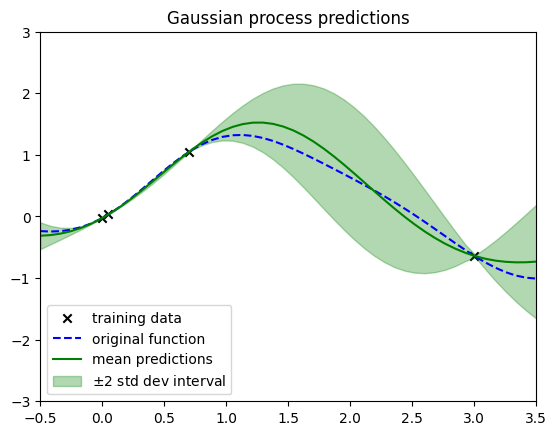

In [17]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

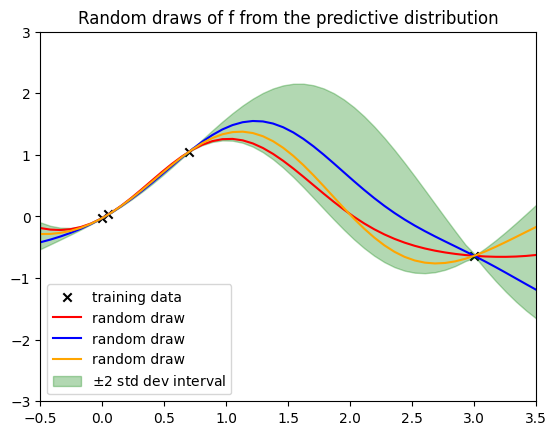

In [18]:
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
y_all_draws=gpfit.sample_y(xcurve.reshape(-1,1),random_state=rng,n_samples=3)
color_options=["red","blue","orange"]
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
for i, ydraw in enumerate(y_all_draws.T): plt.plot(xcurve,ydraw,label="random draw",color=color_options[np.mod(i,3)])
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Random draws of f from the predictive distribution")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

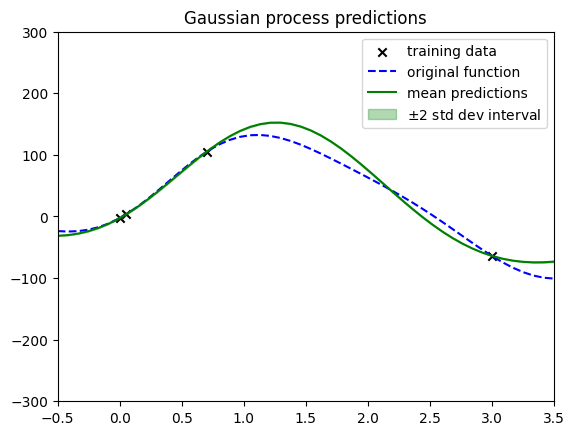

In [19]:
# observed y values are 100 times what they were in the nice example
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(xobs.reshape(-1,1),100*yobs.reshape(-1,1))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,100*yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,100*ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-100*3*signal_stddev,100*3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

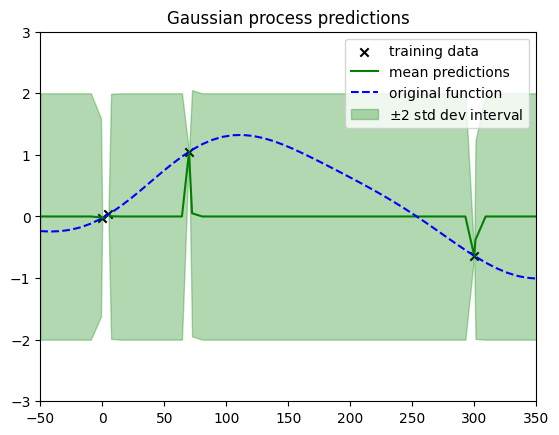

In [20]:
# observed x values are 100 times what they were in the nice example
gpfit = GaussianProcessRegressor(kernel=kern, optimizer=None) # NOT fitting kernel hyperparameters
gpfit.fit(100*xobs.reshape(-1,1),yobs.reshape(-1,1))
xall=np.sort(np.concatenate((xcurve,xobs)))
mean_pred, stddev_pred = gpfit.predict(100*xall.reshape(-1,1), return_std=True)
plt.scatter(100*xobs,yobs,color="black",marker="x", label="training data")
plt.plot(100*xall,mean_pred,color="green", label="mean predictions")
plt.plot(100*xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.fill_between(100*xall,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([100*xstart,100*xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

In [20]:
print(np.exp(-0.5*2.0**2))

0.1353352832366127


Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

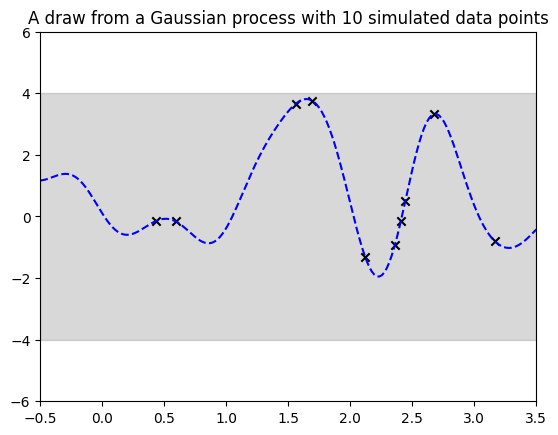

In [33]:
signal_stddev = 2.0; kern = signal_stddev**2*RBF(length_scale=0.3,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xstart=-0.5; xstop=3.5; Nobs = 10; xobs = rng.uniform(xstart,xstop,size=Nobs)
numx=200; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]; yobs=yall[numx:numx+Nobs]
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue"); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

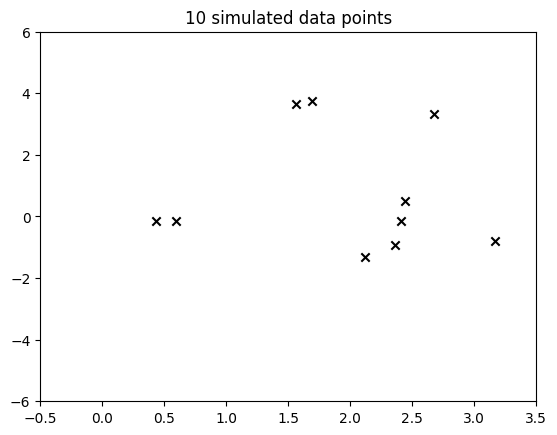

In [34]:
# just the training data
plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title(str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

Original kernel: 2**2 * RBF(length_scale=0.3)
Fit kernel: 2.29**2 * RBF(length_scale=0.293)


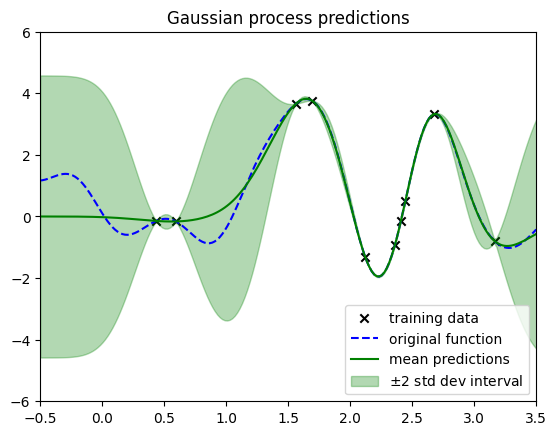

In [35]:
signal_stddev_init = 1.0; kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(0.01, 100))
gpfit = GaussianProcessRegressor(kernel=kern_fit,n_restarts_optimizer=10) # now we ARE fitting the hyperparameters
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1));
print("Original kernel: " + str(kern)); 
print("Fit kernel: " + str(gpfit.kernel_))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

In [36]:
from sklearn.gaussian_process.kernels import WhiteKernel

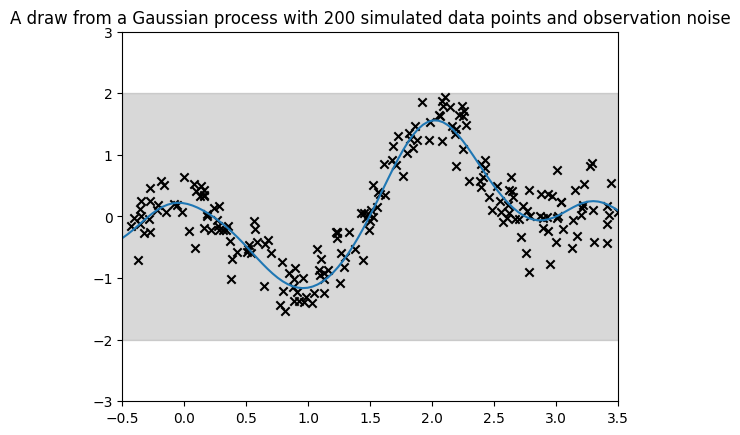

In [37]:
signal_stddev = 1.0; noise_stddev = 0.3
kern = signal_stddev**2*RBF(length_scale=0.4,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xstart=-0.5; xstop=3.5; Nobs = 200; xobs = rng.uniform(xstart,xstop,size=Nobs)
numx=100; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]
yobs=yall[numx:numx+Nobs]+rng.normal(loc=0.0,scale=noise_stddev,size=Nobs).reshape(-1,1)
plt.plot(xcurve,ycurve); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points and observation noise") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

Original kernel: 1**2 * RBF(length_scale=0.4) and noise level (variance) 0.09
Fit kernel: 0.755**2 * RBF(length_scale=0.459) + WhiteKernel(noise_level=0.0975)


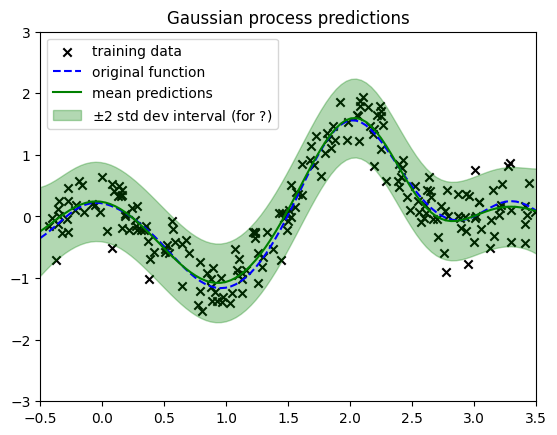

In [38]:
signal_stddev_init = 1.0; noise_stddev_init = 0.5;
# now we are fitting the signal, length scale, and noise
kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(0.01, 100)) + WhiteKernel(noise_level=noise_stddev_init**2, noise_level_bounds=(0.00001, 10))
gpfit = GaussianProcessRegressor(kernel=kern_fit,alpha=0.0,n_restarts_optimizer=10) 
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1));
print("Original kernel: " + str(kern) + " and noise level (variance) " + str(noise_stddev**2)); 
print("Fit kernel: " + str(gpfit.kernel_))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval (for ?)")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

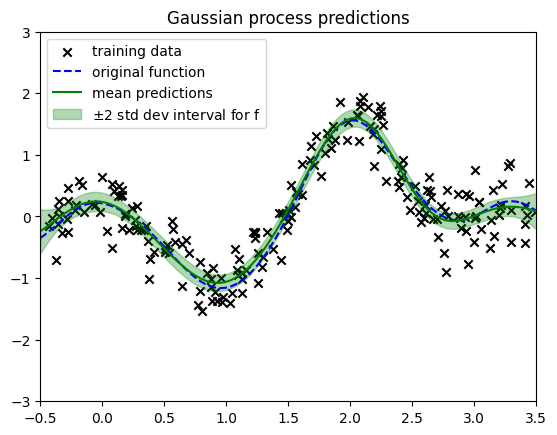

In [39]:
kern_rbf = gpfit.kernel_.get_params()['k1']
alpha_val = gpfit.kernel_.get_params()['k2__noise_level']
gpf = GaussianProcessRegressor(kernel=kern_rbf,alpha=alpha_val,optimizer=None) 
gpf.fit(xobs.reshape(-1,1),yobs.reshape(-1,1));
mean_pred, stddev_pred = gpf.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval for f")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

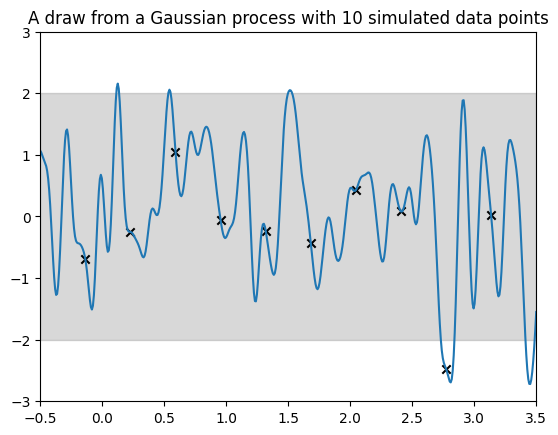

In [40]:
signal_stddev = 1.0; noise_stddev = 0.001
kern = signal_stddev**2*RBF(length_scale=0.05,length_scale_bounds="fixed") # set the kernel
gp = GaussianProcessRegressor(kernel=kern)
xstart=-0.5; xstop=3.5; Nobs = 10; xobs = np.linspace(xstart,xstop,num=Nobs+2)[1:-1]
numx=500; x=np.linspace(start=xstart,stop=xstop,num=numx); twosd=2*signal_stddev*np.ones(numx) # coloring 2 std dev range
plt.fill_between(x,twosd,-twosd,color="gray",alpha=0.3) # coloring 2 std dev range
xcurve=np.linspace(start=xstart,stop=xstop,num=numx); xall = np.concatenate((xcurve,xobs)).reshape(-1,1)
yall = gp.sample_y(xall,random_state=rng,n_samples=1); ycurve=yall[0:numx]
yobs=yall[numx:numx+Nobs]+rng.normal(loc=0.0,scale=noise_stddev,size=Nobs).reshape(-1,1)
plt.plot(xcurve,ycurve); plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title("A draw from a Gaussian process with " + str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

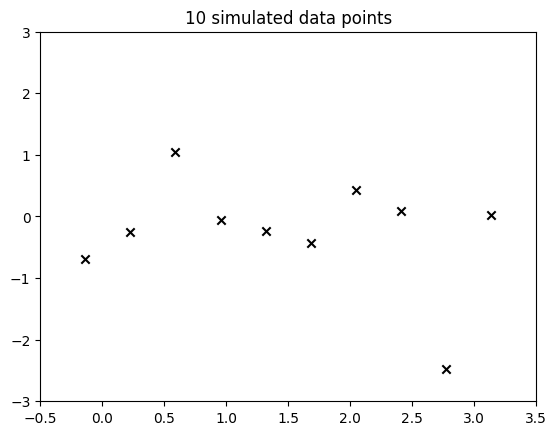

In [41]:
# just the training data
plt.scatter(xobs,yobs,color="black",marker="x")
plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); pltaxes = plt.gca() # make the plot
output = plt.title(str(Nobs) + " simulated data points") # make the plot

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

Original kernel: 1**2 * RBF(length_scale=0.05) and noise level (variance) 1e-06
Fit kernel: 0.859**2 * RBF(length_scale=6.66e-05) + WhiteKernel(noise_level=0.0815)


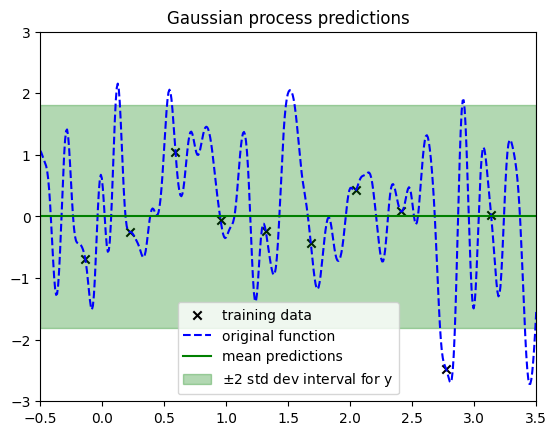

In [45]:
signal_stddev_init = 1.0; noise_stddev_init = 0.5;
# now we are fitting the signal, length scale, and noise
kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(1e-10, 10)) + WhiteKernel(noise_level=noise_stddev_init**2, noise_level_bounds=(1e-8, 10))
gpfit = GaussianProcessRegressor(kernel=kern_fit,alpha=0.0,n_restarts_optimizer=10) 
gpfit.fit(xobs.reshape(-1,1),yobs.reshape(-1,1));
print("Original kernel: " + str(kern) + " and noise level (variance) " + str(noise_stddev**2)); 
print("Fit kernel: " + str(gpfit.kernel_))
mean_pred, stddev_pred = gpfit.predict(xcurve.reshape(-1,1), return_std=True)
plt.scatter(xobs,yobs,color="black",marker="x", label="training data")
plt.plot(xcurve,ycurve,linestyle="dashed",color="blue", label="original function")
plt.plot(xcurve,mean_pred,color="green", label="mean predictions")
plt.fill_between(xcurve,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval for y")
plt.legend(); plt.xlim([xstart,xstop]); plt.ylim((-3*signal_stddev,3*signal_stddev)); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

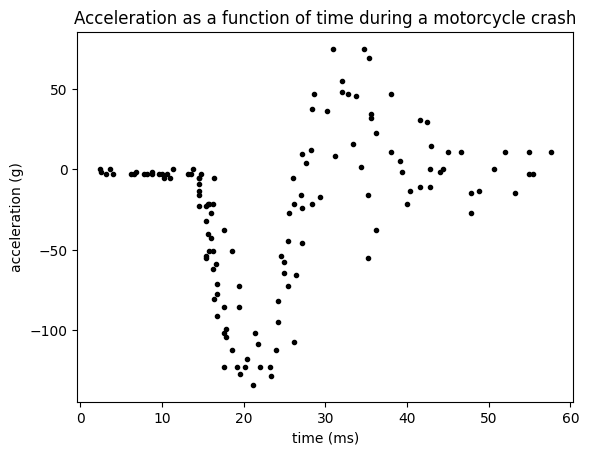

In [46]:
# mcycle from MASS package in R: https://cran.r-project.org/web/packages/MASS/index.html
# Author:	Brian Ripley [aut, cre, cph], Bill Venables [aut, cph], Douglas M. Bates [ctb], Kurt Hornik [trl] (partial port ca 1998), Albrecht Gebhardt [trl] (partial port ca 1998), David Firth [ctb] (support functions for polr)
# Maintainer:	Brian Ripley <ripley at stats.ox.ac.uk>
# License:	GPL-2 | GPL-3 : https://cran.r-project.org/web/licenses/GPL-2 & https://cran.r-project.org/web/licenses/GPL-3
mcycle = np.loadtxt("data/mcycle.csv", comments='#', delimiter=",", usecols=(1,2))
time=mcycle[:,0]
acceleration=mcycle[:,1]
plt.scatter(time,acceleration,marker=".",color="black")
plt.xlabel("time (ms)"); plt.ylabel("acceleration (g)")
plotout = plt.title("Acceleration as a function of time during a motorcycle crash")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

Fit kernel: 0.942**2 * RBF(length_scale=5.22) + WhiteKernel(noise_level=0.22)


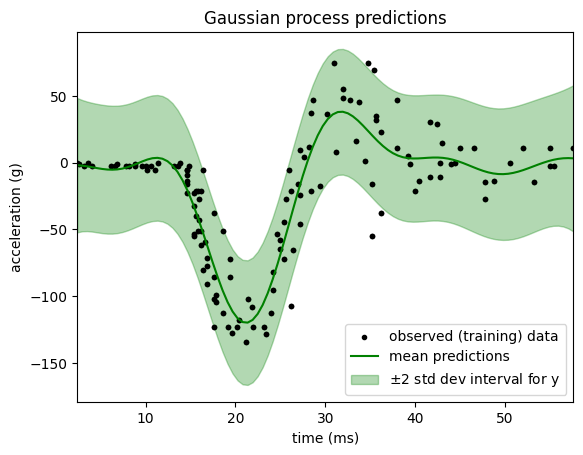

In [47]:
signal_stddev_init = 1.0; noise_stddev_init = 0.5;
# now we are fitting the signal, length scale, and noise
kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(1e-1,1e3)) + WhiteKernel(noise_level=noise_stddev_init**2, noise_level_bounds=(1e-8,1e1))
gpfit = GaussianProcessRegressor(kernel=kern_fit,alpha=0.0,normalize_y=True,n_restarts_optimizer=10) 
gpfit.fit(time.reshape(-1,1),acceleration.reshape(-1,1));
print("Fit kernel: " + str(gpfit.kernel_))
num_time = 100; time_start=time[0]; time_stop=time[-1]
time_vals = np.linspace(start=time_start,stop=time_stop,num=num_time)
mean_pred, stddev_pred = gpfit.predict(time_vals.reshape(-1,1), return_std=True)
plt.scatter(time,acceleration,color="black",marker=".", label="observed (training) data")
plt.plot(time_vals,mean_pred,color="green", label="mean predictions")
plt.fill_between(time_vals,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval for y")
plt.xlim([time_vals[0],time_vals[-1]]); 
plt.scatter(time,acceleration,marker=".",color="black")
plt.xlabel("time (ms)"); plt.ylabel("acceleration (g)")
plt.legend(); plotout = plt.title("Gaussian process predictions")

Break

Break

Break

Break

Break

Break

Break

Break

Break

Break

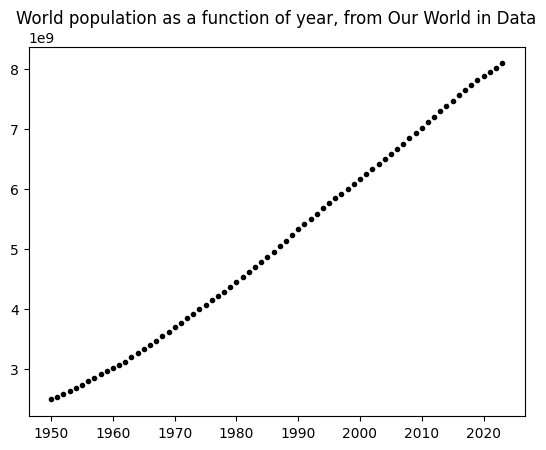

In [48]:
# Population data thanks to Our World in Data
# Hannah Ritchie, Lucas Rodés-Guirao, Edouard Mathieu, Marcel Gerber, Esteban Ortiz-Ospina, Joe Hasell and Max Roser (2023) -
# “Population Growth” Published online at OurWorldInData.org. Retrieved from: 'https://ourworldindata.org/population-growth'
# [Online Resource] Retrieved 2024/08/18
# Shared under a CC BY license https://creativecommons.org/licenses/by/4.0/
popdata = np.loadtxt("data/population-and-demography.csv", comments='#', delimiter=",", usecols=(2,3))
year=popdata[:,0]
pop=popdata[:,1]
plt.scatter(year,pop,marker=".",color="black")
plotout = plt.title("World population as a function of year, from Our World in Data")

Fit kernel: 0.957**2 * RBF(length_scale=13.7) + WhiteKernel(noise_level=2.88e-06)


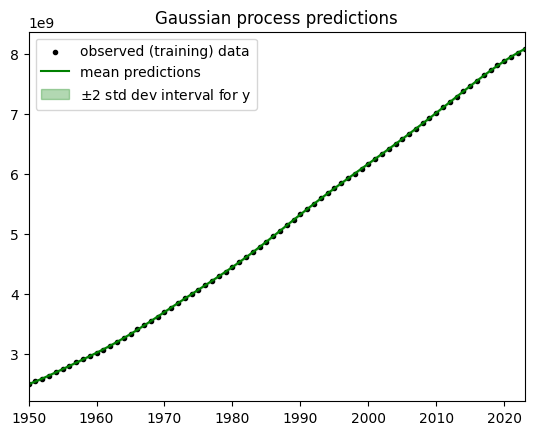

In [53]:
signal_stddev_init = 1.0; noise_stddev_init = 0.5;
# now we are fitting the signal, length scale, and noise
kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(1,1e5)) + WhiteKernel(noise_level=noise_stddev_init**2, noise_level_bounds=(1e-8,1e1))
gpfit = GaussianProcessRegressor(kernel=kern_fit,alpha=0.0,normalize_y=True,n_restarts_optimizer=10) 
gpfit.fit(year.reshape(-1,1),pop.reshape(-1,1));
print("Fit kernel: " + str(gpfit.kernel_))
num_time = 100; year_start=year[0]; year_stop=year[-1] # put future year here instead
time_vals = np.linspace(start=year_start,stop=year_stop,num=num_time)
mean_pred, stddev_pred = gpfit.predict(time_vals.reshape(-1,1), return_std=True)
plt.scatter(year,pop,color="black",marker=".", label="observed (training) data")
plt.plot(time_vals,mean_pred,color="green", label="mean predictions")
plt.fill_between(time_vals,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval for y")
plt.xlim([time_vals[0],time_vals[-1]]); 
plt.legend(); plotout = plt.title("Gaussian process predictions")

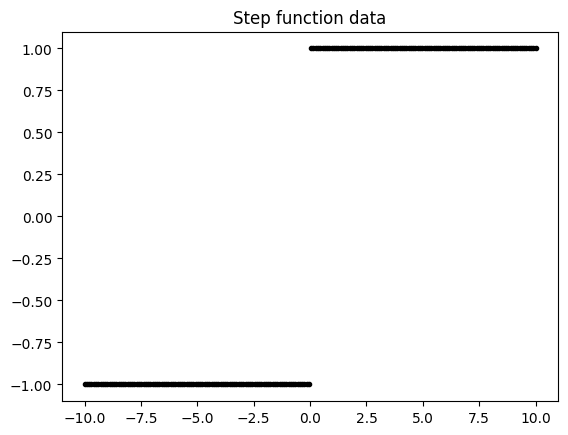

In [31]:
xdata = np.linspace(start=-10,stop=10,num=200)
ydata = 2.0*(xdata>0) - 1.0
plt.scatter(xdata,ydata,marker=".",color="black")
plotout = plt.title("Step function data")

Fit kernel: 0.763**2 * RBF(length_scale=0.558) + WhiteKernel(noise_level=0.0112)


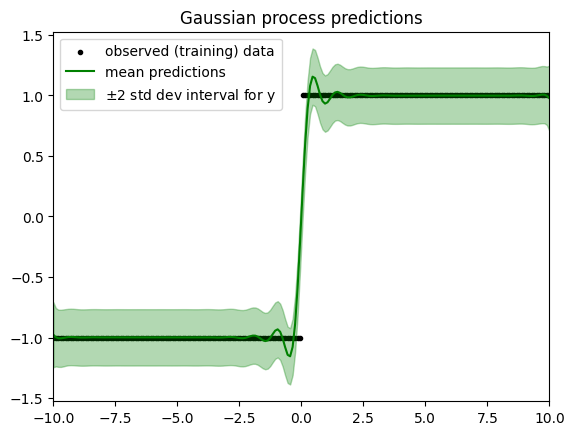

In [32]:
signal_stddev_init = 1.0; noise_stddev_init = 0.5;
# now we are fitting the signal, length scale, and noise
kern_fit = signal_stddev_init**2*RBF(length_scale=1.0,length_scale_bounds=(1e-1,1e3)) + WhiteKernel(noise_level=noise_stddev_init**2, noise_level_bounds=(1e-8,1e1))
gpfit = GaussianProcessRegressor(kernel=kern_fit,alpha=0.0,normalize_y=True,n_restarts_optimizer=10) 
gpfit.fit(xdata.reshape(-1,1),ydata.reshape(-1,1));
print("Fit kernel: " + str(gpfit.kernel_))
num_xplot = 200; xstart=xdata[0]; xstop=xdata[-1]
xvals_plot = np.linspace(start=xstart,stop=xstop,num=num_xplot)
mean_pred, stddev_pred = gpfit.predict(xvals_plot.reshape(-1,1), return_std=True)
plt.scatter(xdata,ydata,color="black",marker=".", label="observed (training) data")
plt.plot(xvals_plot,mean_pred,color="green", label="mean predictions")
plt.fill_between(xvals_plot,mean_pred-2*stddev_pred,mean_pred+2*stddev_pred,color="green",alpha=0.3,label="$\pm$2 std dev interval for y")
plt.xlim([xstart,xstop]); 
plt.legend(); plotout = plt.title("Gaussian process predictions")